In [2]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [19]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --iuxray-preprocessed-train-data-filename "iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   iuxray_preprocessed_train_data_filename: iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=

	#### process 5: running chexpert labeler over 28 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gt_4.csv --output_path /data/labeler-output_gt_4.csv
Generating LALR tables
	**** process 1 finished, elapsed time = 19.41913414001465
Generating LALR tables
	**** process 2 finished, elapsed time = 21.911477088928223
Generating LALR tables
Generating LALR tables
	**** process 3 finished, elapsed time = 24.2127947807312
Generating LALR tables
	**** process 4 finished, elapsed time = 25.197690963745117
	**** process 5 finished, elapsed time = 25.197816371917725
Cache successfully updated and saved to /home/pamessina/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 154 texts ...
Chexpert labeler: running a maximum of 10 concurrent processes over 3 chunks
chunk: i=0, b=0, e=26, chunk_size=26
chunk: i=1, b=26, e=52, chunk_size=26
chunk: i=2, b=52, e=

	**** process 2 finished, elapsed time = 46.80720591545105
Generating LALR tables
	**** process 3 finished, elapsed time = 48.22532916069031
Generating LALR tables
	**** process 4 finished, elapsed time = 48.77972412109375
Generating LALR tables
	**** process 5 finished, elapsed time = 50.59456205368042
Generating LALR tables
	**** process 6 finished, elapsed time = 52.45517611503601
Generating LALR tables
	**** process 7 finished, elapsed time = 53.022743463516235
Generating LALR tables
Generating LALR tables
	**** process 8 finished, elapsed time = 54.59979701042175
Generating LALR tables
	**** process 9 finished, elapsed time = 55.591774463653564
	**** process 10 finished, elapsed time = 55.59191536903381
Cache successfully updated and saved to /home/pamessina/medvqa-workspace/cache/chexpert_labeler_cache.pkl
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model

In [5]:
from medvqa.evaluation.report_generation import get_report_level_metrics_dataframe
from medvqa.utils.files import load_pickle

In [48]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/mimiccxr_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'mimiccxr-template')
report_level_df[report_level_df.columns[:20]]

1it [00:01,  1.09s/it]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,mimiccxr-template,0.292556,0.16136,0.089559,0.047603,0.040582,0.202194,0.181547,0.086572,0.065924,0.538109,0.507157,0.709254,0.591417,0.414662,0.578434,0.472537,0.762789,0.333333,0.344797


In [49]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/iuxray_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'iuxray-template')
report_level_df[report_level_df.columns[:20]]

1it [00:00,  7.22it/s]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,iuxray-template,0.308512,0.189696,0.115125,0.0678,0.056215,0.267732,0.291919,0.135078,0.111919,0.38776,0.387435,0.569231,0.461059,0.403711,0.512298,0.419441,0.839518,0.309524,0.172414


In [43]:
from importlib import reload
import medvqa

In [44]:
reload(eval_rg_template)
reload(medvqa.evaluation.report_generation)

<module 'medvqa.evaluation.report_generation' from '/home/pamessina/medvqa/medvqa/evaluation/report_generation.py'>

In [45]:
from medvqa import eval_rg_template
from medvqa.evaluation.report_generation import ReportGenExamplePlotter
from medvqa.datasets.iuxray.iuxray_vqa_dataset_management import get_iuxray_image_paths
from medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management import get_mimiccxr_image_paths

In [46]:
results = eval_rg_template.evaluate_model(
    checkpoint_folder="models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp",
    mimiccxr_preprocessed_test_data_filename="mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl",
    iuxray_preprocessed_train_data_filename="iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl",
    iuxray_qa_adapted_reports_filename="qa_adapted_reports__20220607_170656.json",
    mimiccxr_qa_adapted_reports_filename="qa_adapted_reports__20220607_184201.json",
    batch_size=160,
    return_results=True,
)


----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/metadata.json

1) device = cuda
checkpoint_names = ['checkpoint_84_cD+wmdcmp+oracc+chxlmicf1+chxlmacf1+qlf1+gacc=0.6339.pt']
2) Loading model from checkpoint ...
checkpoint_path =  /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/checkpoint_84_cD+wmdcmp+oracc+chxlmicf1+chxlmacf1+qlf1+gacc=0.6339.pt
3) Creating instance of DensenetVisualModule model ...
DenseNet121's pretrained weights loaded from ImageNet
4) Creating 

In [47]:
iuxray_example_plotter = ReportGenExamplePlotter(
    reports=results['iuxray_reports'],
    report_metrics=results['iuxray_report_metrics'],
    tokenizer=results['tokenizer'],
    qa_adapted_dataset_path=results['iuxray_qa_adapted_reports_path'],
    images_getter=get_iuxray_image_paths,
)

idx: 95

--
gt_report:

cardiomediastinal silhouette stable and unremarkable.
 stable eventration of the right hemidiaphragm.
 there is redemonstration without significant interval change of mild subsegmental atelectasis of the left base.
 no acute cardiopulmonary abnormality

--
gen_report:

heart size is normal . the mediastinal contour is normal . no focal consolidation . the lungs are free of focal airspace disease . appearance suggest atelectasis .  . pleural effusion is seen . pleural thickening is present . no pneumonia . no pneumothorax is seen . no pulmonary edema . no pulmonary nodules or mass lesions identified . no fracture is seen

--
answered questions:

Cardiomegaly
Enlarged Cardiomediastinum
Consolidation
Lung Opacity
Atelectasis
Support Devices
Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Edema
Lung Lesion
Fracture

--
chexpert_labels_gt: [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
chexpert_labels_gen: [0 0 0 0 0 0 0 0 1 0 1 1 0 0]
chexpert_labels_gt (verbose): Atelectasis


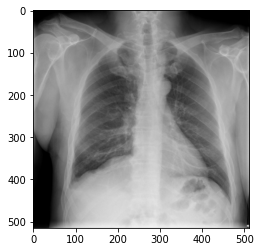

/mnt/workspace/iu-x-ray/dataset/images/CXR3103_IM-1454-1002.png


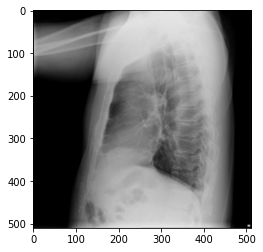

In [48]:
iuxray_example_plotter.inspect_example()

In [87]:
mimiccxr_example_plotter = ReportGenExamplePlotter(
    reports=results['mimiccxr_reports'],
    report_metrics=results['mimiccxr_report_metrics'],
    tokenizer=results['tokenizer'],
    qa_adapted_dataset_path=results['mimiccxr_qa_adapted_reports_path'],
    images_getter=get_mimiccxr_image_paths,
)

idx: 666

--
gt_report:

position of pigtail end catheter in the right lower hemithorax unaltered.
 the same holds for the right-sided pleural effusion and the hydropneumothorax with rather high degree of right lung collapse.
 no significant mediastinal shift is observed.
 unchanged size and position of right-sided hydropneumothorax over the last -hour examination interval

--
gen_report:

heart size is normal . the mediastinal contour is normal . no focal consolidation . the lungs are free of focal airspace disease . appearance suggest atelectasis .  . pleural effusion is seen . no fibrosis . no pneumonia . there is pneumothorax . no pulmonary edema . no pulmonary nodules or mass lesions identified . no fracture is seen

--
answered questions:

Cardiomegaly
Enlarged Cardiomediastinum
Consolidation
Lung Opacity
Atelectasis
Support Devices
Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Edema
Lung Lesion
Fracture

--
chexpert_labels_gt: [0 0 0 0 0 0 0 0 1 1 1 0 0 1]
chexpert_label

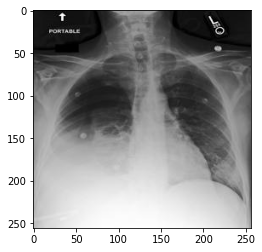

In [97]:
mimiccxr_example_plotter.inspect_example(metrics_to_rank=['chxlabf1'], mode='worst', idx = -300)

In [3]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --iuxray-preprocessed-train-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl" \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220607_170656.json" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220607_184201.json" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220607_184201.json
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220607_170656.json
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   iuxray_preprocessed_train_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,

	#### process 3: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_2.csv --output_path /data/labeler-output_gen_2.csv
	#### process 4: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_3.csv --output_path /data/labeler-output_gen_3.csv
	#### process 5: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_4.csv --output_path /data/labeler-output_gen_4.csv
	#### process 6: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python

In [7]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/iuxray_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'iuxray-template')
report_level_df[report_level_df.columns[:20]]

1it [00:00, 12.08it/s]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,iuxray-template,0.318443,0.198323,0.12422,0.077012,0.052021,0.270814,0.290937,0.134522,0.110691,0.334957,0.372881,0.485294,0.421725,0.359113,0.469553,0.3763,0.829887,0.234043,0.066667


In [8]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/mimiccxr_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'mimiccxr-template')
report_level_df[report_level_df.columns[:20]]

1it [00:01,  1.17s/it]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,mimiccxr-template,0.292506,0.162358,0.090684,0.048331,0.041345,0.202745,0.181152,0.087555,0.0668,0.5263,0.499248,0.689896,0.57929,0.413644,0.586077,0.469231,0.75744,0.377483,0.33877


In [20]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp" \
        --eval-mimiccxr \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl" \
        --template-based-mode "chexpert_labels" \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 4

script's arguments:
   checkpoint_folder: models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp
   template_based_mode: chexpert_labels
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   iuxray_qa_adapted_reports_filename: None
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 4
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp/metadata.json

---------

In [21]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp" \
        --eval-mimiccxr \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl" \
        --template-based-mode "chest_imagenome_labels" \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 8

script's arguments:
   checkpoint_folder: models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp
   template_based_mode: chest_imagenome_labels
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   iuxray_qa_adapted_reports_filename: None
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 8
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp/metadata.json

--

	**** process 1 finished, elapsed time = 3127.719008922577
Generating LALR tables
	**** process 2 finished, elapsed time = 3142.2521464824677
Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 3 finished, elapsed time = 3310.9135019779205
Generating LALR tables
	**** process 4 finished, elapsed time = 3329.5291526317596
Generating LALR tables
	**** process 5 finished, elapsed time = 3362.224892616272
	**** process 6 finished, elapsed time = 3362.2250039577484
	**** process 7 finished, elapsed time = 3362.225049972534
	**** process 8 finished, elapsed time = 3362.2250859737396
Report-level metrics successfully saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp/mimiccxr_report_level_metrics(eval_mode=template-based,chest-imagenome-labels).pkl


In [32]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp" \
        --eval-mimiccxr \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl" \
        --mimiccxr-preprocessed-train-data-filename "mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl" \
        --template-based-mode "chexpert_labels" \
        --calibrate-thresholds \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 4

script's arguments:
   checkpoint_folder: models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp
   template_based_mode: chexpert_labels
   calibrate_thresholds: True
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl
   mimiccxr_preprocessed_train_data_filename: mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   iuxray_qa_adapted_reports_filename: None
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 4
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/vqa/

	#### process 3: running chexpert labeler over 62 texts ...
	Command = docker run -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230201_202908_0.5552538223286319_2.csv --output_path /data/labeler-output_20230201_202908_0.5552538223286319_2.csv
	#### process 4: running chexpert labeler over 62 texts ...
	Command = docker run -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230201_202908_0.5552538223286319_3.csv --output_path /data/labeler-output_20230201_202908_0.5552538223286319_3.csv
Generating LALR tables
	**** process 1 finished, elapsed time = 33.81024169921875
Generating LALR tables
	**** process 2 finished, elapsed time = 34.84695768356323
Generating LALR tables
	**** process 3 finished, elapsed time = 36.35298490524292
Generating LALR tables
	**** process 4 finished, e

In [79]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20230108_144908_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.6_medtok_orien_chx_ql_amp" \
        --eval-mimiccxr \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl" \
        --mimiccxr-preprocessed-train-data-filename "mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl" \
        --template-based-mode "chexpert_labels" \
        --calibrate-thresholds \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 4

script's arguments:
   template_based_mode: chexpert_labels
   checkpoint_folder: models/vqa/20230108_144908_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.6_medtok_orien_chx_ql_amp
   calibrate_thresholds: True
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 4
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl
   mimiccxr_preprocessed_train_data_filename: mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   iuxray_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   eval_iuxray: False
   eval_mimiccxr: True
   eval_mimiccxr

	#### process 2: running chexpert labeler over 57 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230203_001710_0.4462166962749271_1.csv --output_path /data/labeler-output_20230203_001710_0.4462166962749271_1.csv
	#### process 3: running chexpert labeler over 57 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230203_001710_0.4462166962749271_2.csv --output_path /data/labeler-output_20230203_001710_0.4462166962749271_2.csv
	#### process 4: running chexpert labeler over 56 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230203_001710_0.4462166962749271_3.csv --out

In [42]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp" \
        --eval-mimiccxr \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl" \
        --mimiccxr-preprocessed-train-data-filename "mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl" \
        --template-based-mode "chest_imagenome_labels" \
        --calibrate-thresholds \
        --batch-size 160 \
        --max-processes-for-chexpert-labeler 10

script's arguments:
   checkpoint_folder: models/vqa/20230201_080625_mim+mim(chex)+mim(chst-imgn)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0,1.0_medtok_chx_amp
   template_based_mode: chest_imagenome_labels
   calibrate_thresholds: True
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220904_095810.json;tokenizer=4833,39148,4210956387659547011;eval_view_mode=front_single;report_eval_mode=chexpert-labels).pkl
   mimiccxr_preprocessed_train_data_filename: mimiccxr_preprocessed_train_data__(hash=271,1930549729209409981).pkl
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   iuxray_qa_adapted_reports_filename: None
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/mod

	#### process 2: running chexpert labeler over 305 texts ...
	Command = docker run -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230201_213337_0.5014211758986165_1.csv --output_path /data/labeler-output_20230201_213337_0.5014211758986165_1.csv
	#### process 3: running chexpert labeler over 305 texts ...
	Command = docker run -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230201_213337_0.5014211758986165_2.csv --output_path /data/labeler-output_20230201_213337_0.5014211758986165_2.csv
	#### process 4: running chexpert labeler over 305 texts ...
	Command = docker run -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230201_213337_0.5014211758986165_3.csv --output_path /da

In [58]:
!python ../eval_rg_template.py \
        --eval-mimiccxr-oracle \
        --template-based-mode "chest_imagenome_labels__oracle" \
        --batch-size 160 \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220904_095810.json" \
        --chest-imagenome-label-names-filename "labels(min_freq=100).pkl" \
        --chest-imagenome-labels-filename "imageId2labels(min_freq=100).pkl" \
        --max-processes-for-chexpert-labeler 8

script's arguments:
   template_based_mode: chest_imagenome_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   batch_size: 160
   device: GPU
   num_workers: 0
   max_processes_for_chexpert_labeler: 8
   mimiccxr_preprocessed_test_data_filename: None
   mimiccxr_preprocessed_train_data_filename: None
   iuxray_preprocessed_train_data_filename: None
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220904_095810.json
   iuxray_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: labels(min_freq=100).pkl
   chest_imagenome_labels_filename: imageId2labels(min_freq=100).pkl
   eval_iuxray: False
   eval_mimiccxr: False
   eval_mimiccxr_oracle: True
   use_amp: False

----- Evaluating model ------
--------------------------------------------------
1) Initializing tokenizer ...
Loading /mnt/data/pamessina/workspaces/medvqa-workspace/cache/vocab(min_freq=5;mode=report;qa_adapted_reports__20220904_095810.json).pkl ...
Getting label na

Done computing report-level metrics.
Report-level metrics successfully saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230202_154439_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,chest-imagenome-labels--oracle).pkl


In [29]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/report_gen/20230507_200753_mim_Image2ReportModel(dn121->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))" \
        --template-based-mode "chexpert_and_chest_imagenome_labels" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220904_095810.json" \
        --batch-size 100 \
        --num-workers 3 \
        --max-processes-for-chexpert-labeler 8 \
        --calibrate-thresholds \
        --calibration-score-name "f1" \
        --top-k-chest-imagenome-labels 200 \
        --cache-computations

script's arguments:
   template_based_mode: chexpert_and_chest_imagenome_labels
   checkpoint_folder: models/report_gen/20230507_200753_mim_Image2ReportModel(dn121->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))
   calibrate_thresholds: True
   calibration_score_name: f1
   batch_size: 100
   num_workers: 3
   max_processes_for_chexpert_labeler: 8
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220904_095810.json
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: 200
   label_score_threshold: None
   use_amp: False
   cache_computations: True

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/report_gen/20230507_200753_mim_Image2ReportModel(dn121->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/metadata.json
get_image_transform()
  Using bounding box aware transforms
    Returning default transform (no augmentation)


	#### process 5: running chexpert labeler over 370 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230508_200715_0.7365924078228684_4.csv --output_path /data/labeler-output_20230508_200715_0.7365924078228684_4.csv
	#### process 6: running chexpert labeler over 370 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230508_200715_0.7365924078228684_5.csv --output_path /data/labeler-output_20230508_200715_0.7365924078228684_5.csv
	#### process 7: running chexpert labeler over 370 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20230508_200715_0.7365924078228684_6.csv --

In [32]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/report_gen/20230514_181039_mim_Image2ReportModel(dn121->TransfTextDec(posenc,es=512,hs=512,nl=3,nh=4,dff=512))" \
        --template-based-mode "chexpert_labels" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220904_095810.json" \
        --batch-size 100 \
        --num-workers 2 \
        --max-processes-for-chexpert-labeler 4 \
        --calibrate-thresholds \
        --calibration-score-name "f1" \
        --cache-computations

script's arguments:
   template_based_mode: chexpert_labels
   checkpoint_folder: models/report_gen/20230514_181039_mim_Image2ReportModel(dn121->TransfTextDec(posenc,es=512,hs=512,nl=3,nh=4,dff=512))
   calibrate_thresholds: True
   calibration_score_name: f1
   batch_size: 100
   num_workers: 2
   max_processes_for_chexpert_labeler: 4
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220904_095810.json
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   use_amp: False
   cache_computations: True

----- Evaluating model ------
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/report_gen/20230514_181039_mim_Image2ReportModel(dn121->TransfTextDec(posenc,es=512,hs=512,nl=3,nh=4,dff=512))/metadata.json
get_image_transform()
  Using bounding box aware transforms
    Returning default transform (no augmentation)
Compu

Getting label names and templates from CheXpert ...
Loading /mnt/data/pamessina/workspaces/medvqa-workspace/cache/vocab(min_freq=5;mode=report;qa_adapted_reports__20220904_095810.json).pkl ...
Computing report-level metrics...
Example gt text:
lateral chest radiographs demonstrate no interval change from.
 small right pleural effusion , adjacent atelectasis , scar formation are stable.
 the cardiomediastinal silhouette is normal.
 the left hemithorax is unremarkable.
 stable small right pleural effusion compared to.
 this study neither suggests nor excludes the diagnosis of pulmonary embolism
Example gen text:
one or more airspace opacities are seen . appearance suggest atelectasis . pleural effusion is seen
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 3038 texts ...
All labels found in cache, no need to invoke chexpert labeler
(*) Chexpert: labeling 3038 texts ...
Chexpert labeler: running a maxi

In [12]:
!python ../eval_rg_template.py \
--template_based_mode "fact_embedding_labels__oracle" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--fact_embedding_cluster_labels_per_report_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,3753455556037768241).pkl" \
--max_processes_for_chexpert_labeler 10

script's arguments:
   template_based_mode: fact_embedding_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   calibration_score_name: f1
   batch_size: 140
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   mimiccxr_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   fact_embedding_cluster_labels_per_report_filepath: /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,3753455556037768241).pkl
   use_amp: False
   cache_computations: False

----- Evaluating model ------
Evaluating fact embedding template-based oracle ...
Computing report-level metrics...
Example gt text:

In [87]:
!python ../eval_rg_template.py \
--template_based_mode "fact_embedding_labels__oracle" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--fact_embedding_cluster_labels_per_report_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=551,546747151287842333).pkl" \
--max_processes_for_chexpert_labeler 10

script's arguments:
   template_based_mode: fact_embedding_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   calibration_score_name: f1
   batch_size: 140
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   mimiccxr_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   fact_embedding_cluster_labels_per_report_filepath: /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=551,546747151287842333).pkl
   use_amp: False
   cache_computations: False

----- Evaluating model ------
Evaluating fact embedding template-based oracle ...
Computing report-level metrics...
Example gt text:


Getting paths to all the reports...
Got all the paths.
Preprocessing all the reports...
1 reports done
1001 reports done
2001 reports done
3001 reports done
3421 reports done
Done with preprocessing.
Running the inference now... This can take a bit of time
dygie_package_parent_folder: /home/pamessina/dygiepp
Imported dygie successfully
/home/pamessina/dygiepp/dygie/__init__.py
Running command:  PYTHONPATH=/home/pamessina/dygiepp:$PYTHONPATH conda run -n dygiepp allennlp predict /mnt/data/radgraph/data/models/model_checkpoint/model.tar.gz /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/radgraph/temp/temp_dygie_input.json             --predictor dygie             --include-package dygie             --use-dataset-reader             --output-file /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/radgraph/temp/temp_dygie_output.json             --cuda-device -1             --silent
Done with inference
Inference completed.
Postprocessing output file...
Done postprocessing.
Saving resul

Cache successfully updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache_.pkl
RadGraph: deleting temporary folder /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/radgraph/20230831_234823 ...
RadGraph: deleting output file /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/radgraph/results/20230831_234823.jsonl ...
checkpoint_names = ['checkpoint_92_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9587.pt', 'checkpoint_129_cacc+chf1+chf1+cscc+hscc+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)=0.9601.pt']
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/fact_embedding_vectors_cache(cxr-bert-specialized,308,1573598652763032439).pkl. It contains 24345 entries.
(*) Computing fact embedding scores for 3269 reports ...
Computing embeddings for 6822 sentences not found in cache ...
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ens

In [13]:
!python ../eval_rg_template.py \
--template_based_mode "chest_imagenome_labels__oracle" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--chest_imagenome_label_names_filename "labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_labels_filename "imageId2labels(min_freq=0,num_labels=832).pkl" \
--max_processes_for_chexpert_labeler 10

script's arguments:
   template_based_mode: chest_imagenome_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   calibration_score_name: f1
   batch_size: 140
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   mimiccxr_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: labels(min_freq=0,num_labels=832).pkl
   chest_imagenome_labels_filename: imageId2labels(min_freq=0,num_labels=832).pkl
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   fact_embedding_cluster_labels_per_report_filepath: None
   use_amp: False
   cache_computations: False

----- Evaluating model ------
Evaluating chest imagenome template-based oracle ...
Computing report-level metrics...
Example gt text:
The lungs are hyperinflated but 

In [14]:
!python ../eval_rg_template.py \
--template_based_mode "chexpert_labels__oracle" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--max_processes_for_chexpert_labeler 10

script's arguments:
   template_based_mode: chexpert_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   calibration_score_name: f1
   batch_size: 140
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   mimiccxr_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   fact_embedding_cluster_labels_per_report_filepath: None
   use_amp: False
   cache_computations: False

----- Evaluating model ------
Evaluating chexpert labels template-based oracle ...
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 3269 texts ...
All labels fou

In [15]:
!python ../eval_rg_template.py \
--template_based_mode "chexbert_labels__oracle" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--max_processes_for_chexpert_labeler 10

script's arguments:
   template_based_mode: chexbert_labels__oracle
   checkpoint_folder: None
   calibrate_thresholds: False
   calibration_score_name: f1
   batch_size: 140
   num_workers: 0
   max_processes_for_chexpert_labeler: 10
   mimiccxr_qa_adapted_reports_filename: None
   chest_imagenome_label_names_filename: None
   chest_imagenome_labels_filename: None
   top_k_chexpert_labels: None
   top_k_chest_imagenome_labels: None
   label_score_threshold: None
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   fact_embedding_cluster_labels_per_report_filepath: None
   use_amp: False
   cache_computations: False

----- Evaluating model ------
Evaluating chexbert labels template-based oracle ...
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexbert_labeler_cache.pkl
(*) Chexbert: labeling 3269 texts ...
3269it [00:02,

In [88]:
from medvqa.utils.files import load_pickle, load_json
from sklearn.metrics import f1_score
import numpy as np

In [98]:
metrics1 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175542_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,chexpert-labels--oracle).pkl')
reports1 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175542_mimiccxr_oracle/mimiccxr_gen_reports(eval_mode=template-based,chexpert-labels--oracle).pkl')

In [96]:
metrics2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175739_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,chexbert-labels--oracle).pkl')
reports2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175739_mimiccxr_oracle/mimiccxr_gen_reports(eval_mode=template-based,chexbert-labels--oracle).pkl')

In [101]:
metrics3 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175143_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,chest-imagenome-labels--oracle).pkl')
reports3 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_175143_mimiccxr_oracle/mimiccxr_gen_reports(eval_mode=template-based,chest-imagenome-labels--oracle).pkl')

In [102]:
metrics4 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230831_233901_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,fact-embedding-labels--oracle).pkl')
reports4 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230831_233901_mimiccxr_oracle/mimiccxr_gen_reports(eval_mode=template-based,fact-embedding-labels--oracle).pkl')

In [90]:
metrics.keys()

dict_keys(['bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'meteor', 'ciderD', 'chexpert_labels_gt', 'chexpert_labels_gen', 'chexbert_labels_gt', 'chexbert_labels_gen', 'radgraph_labels_gt', 'radgraph_labels_gen', 'fact_embedding_score'])

In [91]:
reports.keys()

dict_keys(['gen_reports', 'report_idxs'])

In [93]:
ans = 0
for i in range(14):
    ans += f1_score(metrics['chexpert_labels_gt'].T[i], metrics['chexpert_labels_gen'].T[i])
ans / 14

0.9902363823227133

In [94]:
bfai = load_json("/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json")

In [106]:
from medvqa.utils.logging import print_bold

In [123]:
i1 = 1
ridx = reports1['report_idxs'][i1]
print(ridx)
print()
i2 = reports2['report_idxs'].index(ridx)
i3 = reports3['report_idxs'].index(ridx)
i4 = reports4['report_idxs'].index(ridx)
print_bold('Original report')
with open(bfai[ridx]['path']) as f:
    print(f.read())
print_bold('Preprocessed report (ground truth)')
print(bfai[ridx]['findings'])
print(bfai[ridx]['impression'])
print()
print_bold('Fact Embedding based report')
print(reports4['gen_reports'][i4])
print()
print_bold('CheXpert labeler based report')
print(reports1['gen_reports'][i1])
print()
print_bold('CheXbert based report')
print(reports2['gen_reports'][i2])
print()
print_bold('Chest ImaGenome based report')
print(reports3['gen_reports'][i3])

498

Original report
                                 FINAL REPORT
 CHEST RADIOGRAPH
 
 TECHNIQUE:  Single portable upright radiograph of the chest was compared with
 prior radiograph from ___.
 
 FINDINGS:
 
 Since prior radiograph from ___, the mediastinal drain tube has
 been removed.  There is no pneumothorax. Both lung volumes are very low.
 Bilateral, right side more than left side,  moderate pulmonary edema has
 improved.  Widened cardiomediastinal silhouette is more than it was on
 ___; however, this appearance could be exacerbation from low
 lung volumes.  Patient is status post median sternotomy with intact sternal
 sutures.

Preprocessed report (ground truth)
Single portable upright radiograph of the chest was compared with prior radiograph from . Since prior radiograph from , the mediastinal drain tube has been removed. There is no pneumothorax. Both lung volumes are very low. Bilateral, right side more than left side, moderate pulmonary edema has improved. Widened cardiome

In [46]:
from medvqa.utils.constants import CHEXPERT_LABELS

In [52]:
n = len(reports['report_idxs'])
idxs_with_errors = []
for i in range(n):
    f1 = f1_score(metrics['chexpert_labels_gt'][i], metrics['chexpert_labels_gen'][i], zero_division=1)
    if f1 < 0.99:
        idxs_with_errors.append((i, f1))

In [53]:
idxs_with_errors.sort(key=lambda x:x[1])

In [66]:
i = idxs_with_errors[5][0]

print(i)
print()
print('gt labels:')
print(metrics['chexpert_labels_gt'][i])
for j, x in enumerate(metrics['chexpert_labels_gt'][i]):
    if x:
        print(CHEXPERT_LABELS[j])
print()
print('gen labels:')
print(metrics['chexpert_labels_gen'][i])
for j, x in enumerate(metrics['chexpert_labels_gen'][i]):
    if x:
        print(CHEXPERT_LABELS[j])
print()
print(reports['report_idxs'][i])
print()
with open(bfai[reports['report_idxs'][i]]['path']) as f:
    print(f.read())
print()
print(bfai[reports['report_idxs'][i]])
print()
print(reports['gen_reports'][i])    

357

gt labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]

gen labels:
[0 1 1 0 0 0 0 0 0 0 0 0 1 0]
Enlarged Cardiomediastinum
Cardiomegaly
Fracture

34515

                                 FINAL REPORT
 PA AND LATERAL CHEST OF ___
 
 COMPARISON:  ___ chest x-ray and CT abdomen of ___.
 
 FINDINGS:  Heart size is normal when allowances are made for prominent
 bilateral pericardial fat pads, shown to better detail on CT abdomen of
 ___.  Mediastinal and hilar contours are within normal limits and
 without change.  Lungs are remarkable for upper lobe predominant emphysema,
 more severe in the right upper lobe than the left.  No new focal lung
 abnormalities were detected, and there are no pleural effusions.  Mild
 compression deformity in the mid thoracic spine is unchanged.
 
 IMPRESSION:  Stable radiographic appearance of the chest with upper lobe
 predominant emphysema.  No evidence of pneumonia.  If symptoms persist,
 consider a chest CT for more complete evaluation if warranted clinically.


{

In [83]:
n = len(reports['report_idxs'])
idxs_with_errors_2 = []
for i in range(n):
    acc = (metrics['chexbert_labels_gt'][i] == metrics['chexbert_labels_gen'][i]).sum()
    if f1 < 0.99:
        idxs_with_errors_2.append((i, acc))

In [84]:
idxs_with_errors_2.sort(key=lambda x:x[1])

In [85]:
from medvqa.utils.constants import CHEXBERT_LABELS

In [86]:
i = idxs_with_errors_2[0][0]
    
print(i)
print()
print('gt labels:')
print(metrics['chexbert_labels_gt'][i])
for j, x in enumerate(metrics['chexbert_labels_gt'][i]):
    if x:
        print(CHEXBERT_LABELS[j])
print()
print('gen labels:')
print(metrics['chexbert_labels_gen'][i])
for j, x in enumerate(metrics['chexbert_labels_gen'][i]):
    if x:
        print(CHEXBERT_LABELS[j])
print()        
print(reports['report_idxs'][i])
print()
with open(bfai[reports['report_idxs'][i]]['path']) as f:
    print(f.read())
print()
print(bfai[reports['report_idxs'][i]])
print()
print(reports['gen_reports'][i])    

1020

gt labels:
[1 0 0 1 0 0 0 0 0 0 0 0 0 0]
Enlarged Cardiomediastinum
Lung Lesion

gen labels:
[1 0 1 0 1 0 1 0 1 1 0 0 0 0]
Enlarged Cardiomediastinum
Lung Opacity
Edema
Pneumonia
Pneumothorax
Pleural Effusion

81235

                                 FINAL REPORT
 INDICATION:  History: ___M with fever, malaise  // r/o infiltrate
 
 TECHNIQUE:  Frontal and lateral views of the chest.
 
 COMPARISON:  Chest radiograph ___
 
 FINDINGS: 
 
 A known mass in the left upper lobe is not clearly identified. No new opacity
 pulmonary edema, pleural effusion or pneumothorax.  The cardiac and
 mediastinal contours are stable.
 
 IMPRESSION: 
 
 No new opacity concerning for infection.


{'background': 'indication: History: M with fever, malaise // r/o infiltrate.', 'findings': 'Frontal and lateral views of the chest. A known mass in the left upper lobe is not clearly identified. No new opacity pulmonary edema, pleural effusion or pneumothorax. The cardiac and mediastinal contours are stable.',

In [28]:
f1_score(np.zeros(10,), np.zeros(10,), zero_division=1)

1.0

In [26]:
for i in range(metrics['chexpert_labels_gen'].shape[0]):
    if np.any(metrics['chexpert_labels_gen'][i] != metrics['chexpert_labels_gt'][i]):
        print(metrics['chexpert_labels_gt'][i])
        print(metrics['chexpert_labels_gen'][i])
        print(reports['gen_reports'][i])
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
heart size is normal. the mediastinal contour is normal. no focal consolidation. the lungs are free of focal airspace disease. no atelectasis. no pleural effusion. no fibrosis. no pneumonia. no pneumothorax is seen. no pulmonary edema. no pulmonary nodules or mass lesions identified. no fracture is seen


In [10]:
tmp['fact_embedding_score']

0.8286600978540769

In [11]:
sum(tmp['meteor']) / len(tmp['meteor'])

0.34321147178499845

In [15]:
from medvqa.utils.metrics import jaccard_score_between_dicts

sum(jaccard_score_between_dicts(x, y) for x,y in zip(tmp['radgraph_labels_gen'], tmp['radgraph_labels_gt'])) / len(tmp['radgraph_labels_gen'])

0.21408194129041258

In [4]:
tmp2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/report_gen/20230830_135233_mimiccxr_oracle/mimiccxr_report_level_metrics(eval_mode=template-based,chexpert-labels--oracle).pkl')

In [5]:
tmp2.keys()

dict_keys(['bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'meteor', 'ciderD', 'chexpert_labels_gt', 'chexpert_labels_gen', 'chexbert_labels_gt', 'chexbert_labels_gen', 'radgraph_labels_gt', 'radgraph_labels_gen', 'fact_embedding_score'])

In [37]:
tmp2['fact_embedding_score']

0.6568692706709938

In [8]:
ans = 0
for i in range(14):
    ans += f1_score(tmp2['chexpert_labels_gt'].T[i], tmp2['chexpert_labels_gen'].T[i])
ans / 14

0.9902363823227133

In [9]:
import numpy as np

In [38]:
from medvqa.utils.metrics import jaccard_score_between_dicts

sum(jaccard_score_between_dicts(x, y) for x,y in zip(tmp2['radgraph_labels_gen'], tmp2['radgraph_labels_gt'])) / len(tmp2['radgraph_labels_gen'])

0.0660634372040371

In [1]:
from medvqa.metrics.medical.chexbert import CheXbertLabeler

In [3]:
chexbert = CheXbertLabeler(verbose=True)

In [4]:
sentences = [
    'heart size is normal',
    'the heart is enlarged',
    
    'the mediastinal contour is normal',
    'the cardiomediastinal silhouette is enlarged',
    
    'no pulmonary nodules or mass lesions identified',
    'there are pulmonary nodules or mass identified',
    
    'the lungs are free of focal airspace disease',
    'one or more airspace opacities are seen',
    
    'no pulmonary edema',
    'pulmonary edema is seen', # Not present in GT sentences
    
    'no focal consolidation',
    'there is focal consolidation', # Not present in GT sentences
    
    'no pneumonia',
    'there is evidence of pneumonia', # Not present in GT sentences
    
    'no atelectasis', # Not present in GT sentences
    'appearance suggest atelectasis',
    
    'no pneumothorax is seen',
    'there is pneumothorax',
    
    'no pleural effusion',
    'pleural effusion is seen', # Not present in GT sentences
    
    'no fibrosis',
    'pleural thickening is present', # Not present in GT sentences
    
    'no fracture is seen',
    'a fracture is identified', # Not present in GT sentences
    
    '', # Empty on purpose
    'a device is seen', # Not present in GT sentences
    
    'the heart is enlarged. the mediastinal contour is normal. no focal consolidation. one or more airspace opacities are seen. appearance suggest atelectasis. a device is seen. pleural effusion is seen. no fibrosis. there is evidence of pneumonia. no pneumothorax is seen. pulmonary edema is seen. no pulmonary nodules or mass lesions identified. no fracture is seen',
]

labels = chexbert.get_labels(sentences)

print(labels)

from medvqa.utils.constants import CHEXBERT_LABELS

for j in range(labels.shape[0]):
    print(sentences[j])
    for i, name in enumerate(CHEXBERT_LABELS):
        if labels[j, i] == 1:
            print(f'\t{name}')            

(*) Chexbert: labeling 27 texts ...


27it [00:01, 24.88it/s]

Done labeling: 37 new labels found and cached
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 1 0 1 0 1 1 0 1 0 0 1 0]]
heart size is normal
	No Finding
the heart is enlarged
	Cardiomegaly
the mediastinal contour is normal
	No Finding
t

In [59]:
radgraph_cache = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache_.pkl')

In [61]:
len(radgraph_cache['label2string'])

36099

In [57]:
for x in tmp2['radgraph_labels_gt'][-1]:
    print(radgraph_cache['label2string'][x])

reduced|OBS-DP
volume|ANAT-DP
right|ANAT-DP
hemithorax|ANAT-DP
lateral|ANAT-DP
pleural|ANAT-DP
thickening|OBS-DP
areas|OBS-DP
constant|OBS-DP
size|OBS-DP
morphology|OBS-DP
unchanged|OBS-DP
perihilar|ANAT-DP
fibrosis|OBS-DP
size|ANAT-DP
aspect|ANAT-DP
cardiac|ANAT-DP
silhouette|ANAT-DP
pathologic|OBS-DA
changes|OBS-DA
left|ANAT-DP
lung|ANAT-DP
reduced|OBS-DP|located_at|hemithorax|ANAT-DP
reduced|OBS-DP|hemithorax|ANAT-DP
volume|ANAT-DP|modify|hemithorax|ANAT-DP
volume|ANAT-DP|hemithorax|ANAT-DP
right|ANAT-DP|modify|hemithorax|ANAT-DP
right|ANAT-DP|hemithorax|ANAT-DP
lateral|ANAT-DP|modify|pleural|ANAT-DP
lateral|ANAT-DP|pleural|ANAT-DP
thickening|OBS-DP|located_at|pleural|ANAT-DP
thickening|OBS-DP|pleural|ANAT-DP
constant|OBS-DP|modify|thickening|OBS-DP
constant|OBS-DP|thickening|OBS-DP
unchanged|OBS-DP|modify|fibrosis|OBS-DP
unchanged|OBS-DP|fibrosis|OBS-DP
fibrosis|OBS-DP|located_at|perihilar|ANAT-DP
fibrosis|OBS-DP|perihilar|ANAT-DP
unchanged|OBS-DP|located_at|cardiac|ANAT-DP
unchang

In [62]:
for x in tmp2['radgraph_labels_gen'][-1]:
    print(radgraph_cache['label2string'][x])

abnormal|OBS-DA
cardiac|ANAT-DP
silhouette|ANAT-DP
lung|ANAT-DP
opacity|OBS-DP
left|ANAT-DP
hilar|ANAT-DP
structures|ANAT-DP
pleural|ANAT-DP
parenchymal|ANAT-DP
scarring|OBS-DP
abnormal|OBS-DP
interstitial|ANAT-DP
disease|OBS-DP
right|ANAT-DP
silhouette|ANAT-DP|modify|cardiac|ANAT-DP
silhouette|ANAT-DP|cardiac|ANAT-DP
scarring|OBS-DP|located_at|pleural|ANAT-DP
scarring|OBS-DP|pleural|ANAT-DP
scarring|OBS-DP|located_at|parenchymal|ANAT-DP
scarring|OBS-DP|parenchymal|ANAT-DP
left|ANAT-DP|modify|hilar|ANAT-DP
left|ANAT-DP|hilar|ANAT-DP
abnormal|OBS-DP|located_at|hilar|ANAT-DP
abnormal|OBS-DP|hilar|ANAT-DP
opacity|OBS-DP|located_at|lung|ANAT-DP
opacity|OBS-DP|lung|ANAT-DP
left|ANAT-DP|modify|lung|ANAT-DP
left|ANAT-DP|lung|ANAT-DP
pleural|ANAT-DP|modify|lung|ANAT-DP
pleural|ANAT-DP|lung|ANAT-DP
parenchymal|ANAT-DP|modify|lung|ANAT-DP
parenchymal|ANAT-DP|lung|ANAT-DP
interstitial|ANAT-DP|modify|lung|ANAT-DP
interstitial|ANAT-DP|lung|ANAT-DP
disease|OBS-DP|located_at|lung|ANAT-DP
disease|OBS-

In [11]:
tmp['ciderD']

(0.20129166497349046,
 array([4.18495999e-01, 5.79754572e-02, 2.15772211e-01, ...,
        2.83333854e-21, 8.62252291e-02, 5.68641055e-02]))

In [27]:
def compute_f1_macro_average(gt_labels, pred_labels):
    from sklearn.metrics import f1_score
    import numpy as np
    f1_scores = []
    for i in range(gt_labels.shape[1]):
        f1_scores.append(f1_score(gt_labels[:, i], pred_labels[:, i]))
    return np.mean(f1_scores)

def compute_p_macro_average(gt_labels, pred_labels):
    from sklearn.metrics import precision_score
    import numpy as np
    scores = []
    for i in range(gt_labels.shape[1]):
        scores.append(precision_score(gt_labels[:, i], pred_labels[:, i]))
    return np.mean(scores)

def compute_r_macro_average(gt_labels, pred_labels):
    from sklearn.metrics import recall_score
    import numpy as np
    scores = []
    for i in range(gt_labels.shape[1]):
        scores.append(recall_score(gt_labels[:, i], pred_labels[:, i]))
    return np.mean(scores)

def compute_acc_macro_average(gt_labels, pred_labels):
    from sklearn.metrics import accuracy_score
    import numpy as np
    scores = []
    for i in range(gt_labels.shape[1]):
        scores.append(accuracy_score(gt_labels[:, i], pred_labels[:, i]))
    return np.mean(scores)


compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

(0.4706166468777703,
 0.42290075608286815,
 0.5613109886502212,
 0.7685742499764883)

In [31]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

(0.480118085756104, 0.3979864824047468, 0.6626863207798651, 0.7227734411737045)

In [53]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

(0.48012361967749356,
 0.41296453140928974,
 0.6240210880144051,
 0.7436753503244615)

In [57]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

(0.47793350617668384,
 0.4105327953421742,
 0.6247311951656409,
 0.7419354838709677)

In [60]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

(0.4764126419414267,
 0.40643910951582596,
 0.6305354459540282,
 0.7382676572933321)

In [19]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
sum(tmp['medcomp']) / len(tmp['medcomp'])

/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: Un

(0.4100030115186518,
 0.34668373767660815,
 0.548544507770213,
 0.750423210758958,
 0.04348512149542807)

In [16]:
compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_p_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_r_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
compute_acc_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen']), \
sum(tmp['medcomp']) / len(tmp['medcomp'])

/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pamessina/venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: Un

(0.39006776790885256,
 0.3333843829471378,
 0.5159377712172157,
 0.76154424903602,
 0.04564046842211187)

In [47]:
def compute_f1_macro_average(gt_labels, pred_labels):
    from sklearn.metrics import f1_score
    import numpy as np
    f1_scores = []
    for i in range(gt_labels.shape[1]):
        f1_scores.append(f1_score(gt_labels[:, i], pred_labels[:, i]))
    return np.mean(f1_scores)

compute_f1_macro_average(tmp['chexpert_labels_gt'], tmp['chexpert_labels_gen'])

0.2676535211572287

In [21]:
sum(tmp['medcomp']) / len(tmp['medcomp'])

0.08583801579080196